# Base Station Positions

This example uses the Telecom Dataset, provided by Shanghai Telecom, to predict the optimal positions for base radio stations. This dataset contains more than 7.2 million records about people's Internet access through 3,233 base stations from 9,481 mobile phones over period of six months. The dataset can be found [here](http://sguangwang.com/TelecomDataset.html). It consists of:

<ul><li><b>user_id :</b> User's ID</li>
<li><b>start_time :</b> When the record begins</li>
<li><b>end_time :</b> When the record ends</li>
<li><b>latitude :</b> Latitude of the base station</li>
<li><b>longitude :</b> Longitude of the base station</li>
</ul>
To complement the study, we'll also use the <a href="../../data/shanghai_districts.csv">shanghai_districts</a> dataset, which contains information on Shanghai's districts. Some of the columns include:

<ul><li><b>name :</b> Name of the district</li>
<li><b>division_code :</b> Division code of the district</li>
<li><b>area :</b> Area of the district in square kilometers</li>
<li><b>population :</b> Population of the district</li>
<li><b>density :</b> Density of the district</li>
<li><b>geometry :</b> Polygon of type 'Geometry' that contains the coordinates of the district</li>
</ul> 


## Initialization

This example uses the following version of VerticaPy:

In [1]:
import verticapy as vp

vp.__version__

'1.1.0-beta'

Connect to Vertica. This example uses an existing connection called "VerticaDSN." For details on how to create a connection, use see the <a href="../../connection.php">connection tutorial</a>.

In [2]:
vp.connect("VerticaDSN")

Connected Successfully!


Let's load the two datasets.

In [3]:
# Creating the schema
vp.drop("shanghai", method = "schema")
vp.create_schema("shanghai")

# Libraries import
import matplotlib

import verticapy.sql.functions as fun
from verticapy.datasets import load_world

# Increasing video limit
matplotlib.rcParams['animation.embed_limit'] = 2**128

#######
# CDR #
#######
cdr = vp.read_csv(
    "shanghai_cdr.csv", 
    schema = "shanghai", 
    table_name = "cdr", 
    sep = ",",
    parse_nrows = 1000,
)
# Unique Row id: It will be used to compute the Polygons intersection
cdr["row_id"] = "ROW_NUMBER() OVER(ORDER BY user_id, start_time)"

######################
# Shanghai Districts #
######################
shanghai_districts = vp.read_csv(
    "shanghai_districts.csv", 
    schema = "shanghai", 
    table_name = "districts", 
    sep = ",",
)
# Converting the districts to Geometry
shanghai_districts = shanghai_districts["geometry"].apply("ST_GeomFromText({})")
# Creating Shanghai 
shanghai_districts["district_level"] = fun.case_when(
    shanghai_districts["number"] <= 7, 'Downtown',
    shanghai_districts["number"] <= 11, 'Suburb1',
    shanghai_districts["number"] <= 15, 'Suburb2',
    'Suburb3',
)

The table "shanghai"."cdr" has been successfully created.
The table "shanghai"."districts" has been successfully created.


These datasets contain the following:

None                                user_id             start_time   \\
1      0001fa09-7c95-e138-d83d-f164831449d8    2014-07-24 08:54:00   \\
2      0004dc5b-9f35-7904-4a37-6c2de4513a02    2014-07-02 19:14:00   \\
3      0004dc5b-9f35-7904-4a37-6c2de4513a02    2014-07-02 19:25:00   \\
4      0004dc5b-9f35-7904-4a37-6c2de4513a02    2014-07-02 19:36:00   \\
5      0004dc5b-9f35-7904-4a37-6c2de4513a02    2014-07-02 19:42:00   \\
6      00070e8f-253b-ed8d-b1e7-0c70e6d4fd23    2014-07-24 12:46:00   \\
7      00070e8f-253b-ed8d-b1e7-0c70e6d4fd23    2014-07-24 12:49:00   \\
8      00070e8f-253b-ed8d-b1e7-0c70e6d4fd23    2014-07-24 12:52:00   \\
9      00070e8f-253b-ed8d-b1e7-0c70e6d4fd23    2014-07-24 12:56:00   \\
10     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-01 06:36:00   \\
11     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-01 09:34:00   \\
12     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-01 09:46:00   \\
13     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-02 12:56:00   \\
14     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-02 13:46:00   \\
15     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-03 14:55:00   \\
16     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-04 10:51:00   \\
17     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-05 11:52:00   \\
18     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-05 17:56:00   \\
19     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-05 21:00:00   \\
20     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-06 14:00:00   \\
21     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-06 22:36:00   \\
22     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-06 23:00:00   \\
23     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-07 08:29:00   \\
24     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-07 10:00:00   \\
25     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-07 14:00:00   \\
26     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-07 20:03:00   \\
27     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-09 14:59:00   \\
28     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-09 18:02:00   \\
29     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-09 21:03:00   \\
30     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-09 23:00:00   \\
31     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-11 09:52:00   \\
32     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-11 20:49:00   \\
33     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-11 23:18:00   \\
34     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-11 23:56:00   \\
35     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-12 10:05:00   \\
36     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-12 12:19:00   \\
37     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-12 14:35:00   \\
38     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-12 14:41:00   \\
39     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-12 16:24:00   \\
40     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-12 22:33:00   \\
41     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-12 23:00:00   \\
42     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-14 08:53:00   \\
43     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-14 14:21:00   \\
44     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-14 15:04:00   \\
45     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-14 22:51:00   \\
46     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-14 23:00:00   \\
47     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-15 14:08:00   \\
48     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-15 17:10:00   \\
49     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-15 18:19:00   \\
50     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-16 00:24:00   \\
51     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-16 06:27:00   \\
52     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-16 07:03:00   \\
53     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-16 09:07:00   \\
54     0010eb6c-d724-b3d5-fda5-4cbba05c23f6    2014-07-16 11:04:00   \\
55     0010eb6c-d724-b3d5-fda5-4cbba05c2
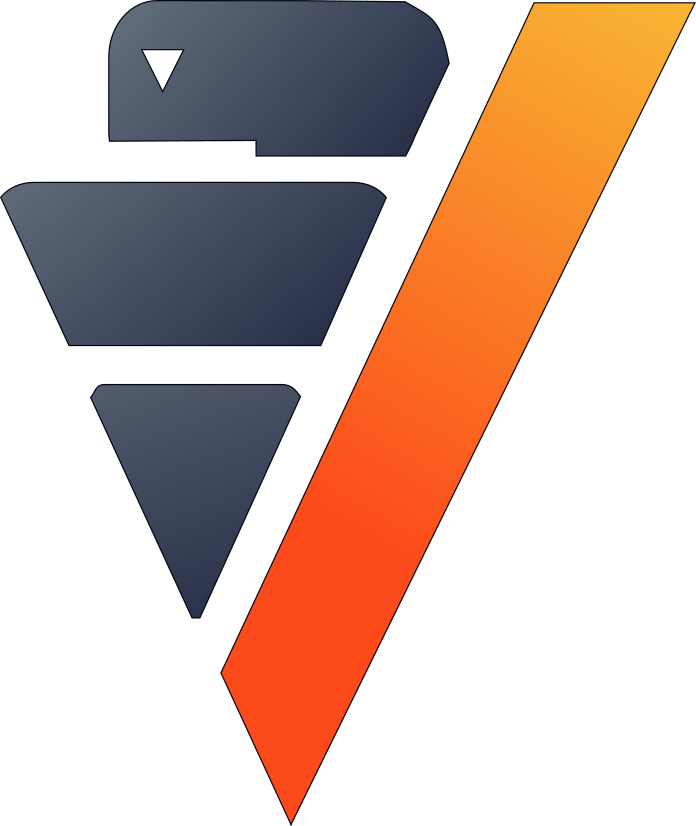

In [4]:
cdr.head(100)

None  number    division_code    code                  name   \\
1          1           310101     HGP      Huangpu District   \\
2          2           310104     XHI        Xuhui District   \\
3          4           310106     JAQ      Jing'an District   \\
4          3           310105     CNQ    Changning District   \\
5          5           310107     PTQ        Putuo District   \\
6          9           310112     MHQ      Minhang District   \\
7         10           310113     BAO      Baoshan District   \\
8         15           310120     FXI     Fengxian District   \\
9          6           310109     HKQ      Hongkou District   \\
10         7           310110     YPU       Yangpu District   \\
11        12           310116     JSH      Jinshan District   \\
12        16           310151     CMG    Chongming District   \\
13         8           310115     PDX                Pudong   \\
14        11           310114     JDG      Jiading District   \\
15        13           310117     SOJ    Songjiang District   \\
16        14           310118     QPU       Qingpu District   \\
None  local_name       area    population    density                                  geometry   \\
1            黄浦区      20.46        653800      31955  POLYGON ((121.4522039 31.2257742, 121...   \\
2            徐汇区      54.76       1084400      19803  POLYGON ((121.3868848 31.1705411, 121...   \\
3            静安区      36.88       1062800      28818  POLYGON ((121.4139649 31.2940676, 121...   \\
4            长宁区       38.3        694000      18120  POLYGON ((121.3273302 31.1912813, 121...   \\
5            普陀区      54.83       1281900      23380  POLYGON ((121.321716 31.2897473, 121....   \\
6            闵行区     370.75       2543500        686  POLYGON ((121.2363562 31.2413741, 121...   \\
7            宝山区     270.99       2042300       7536  POLYGON ((121.295578 31.5017533, 121....   \\
8            奉贤区     687.39       1152000       1676  POLYGON ((121.3467333 30.9326791, 121...   \\
9            虹口区      23.48        797000      33944  POLYGON ((121.4554739 31.2917848, 121...   \\
10           杨浦区      60.73       1312700      21615  POLYGON ((121.4808898 31.3122546, 121...   \\
11           金山区     586.05        805000       1374  POLYGON ((120.9842778 30.8350171, 120...   \\
12           崇明区    1185.49        688100        580  POLYGON ((121.0966408 31.7642695, 121...   \\
13          浦东新区    1210.41       5550200       4585  POLYGON ((121.4525228 31.1473143, 121...   \\
14           嘉定区      464.2       1588900       3423  POLYGON ((121.1019338 31.3685836, 121...   \\
15           松江区     605.64       1762200       2910  POLYGON ((121.0194912 30.9116369, 121...   \\
16           青浦区     670.14       1219100       1819  POLYGON ((120.8508584 31.1090894, 120...   \\
None  district_level  
1           Downtown  
2           Downtown  
3           Downtown  
4           Downtown  
5           Downtown  
6            Suburb1  
7            Suburb1  
8            Suburb2  
9           Downtown  
10          Downtown  
11           Suburb2  
12           Suburb3  
13           Suburb1  
14           Suburb1  
15           Suburb2  
16           Suburb2  
Rows: 1-16 | Columns: 10
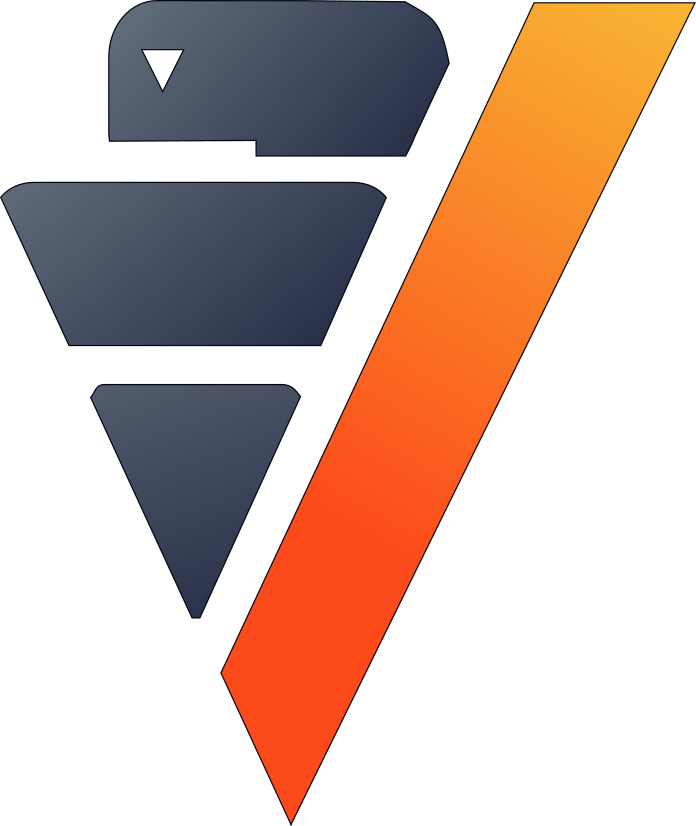

In [5]:
shanghai_districts.head(100)

## Data Exploration

### Detecting outliers

Since we're only concerned about the base stations in Shanghai, let's begin by finding the global outliers in our our Shanghai Telecom dataset, 'cdr'. First, we load the "World" dataset, a predefined dataset in VerticaPy, and then plot  on a map of China to see if any points fall outside of Shanghai. We can then drop these outliers using the z-score method.

**Outliers**

Text(0.5, 1.0, "Shanghai's Base Stations with Outliers")

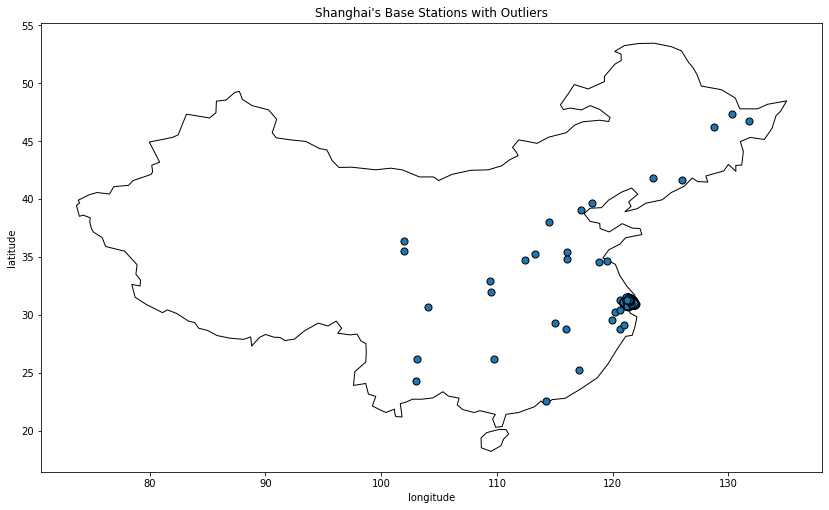

In [6]:
# Setting up the plotting Library to Matplotlib
vp.set_option("plotting_lib", "matplotlib")

# Outliers
world = load_world()
china = world[world["country"] == "China"]
ax = china["geometry"].geo_plot(
    color = "white",
    edgecolor = "black",
)
cdr.groupby(["longitude", "latitude"]).scatter(
    ["longitude", "latitude"],
    ax = ax,
)
ax.set_title("Shanghai's Base Stations with Outliers")

**Without Outliers**

5943 elements were filtered.
12801 elements were filtered.


Text(0.5, 1.0, "Shanghai's Base Stations without Outliers")

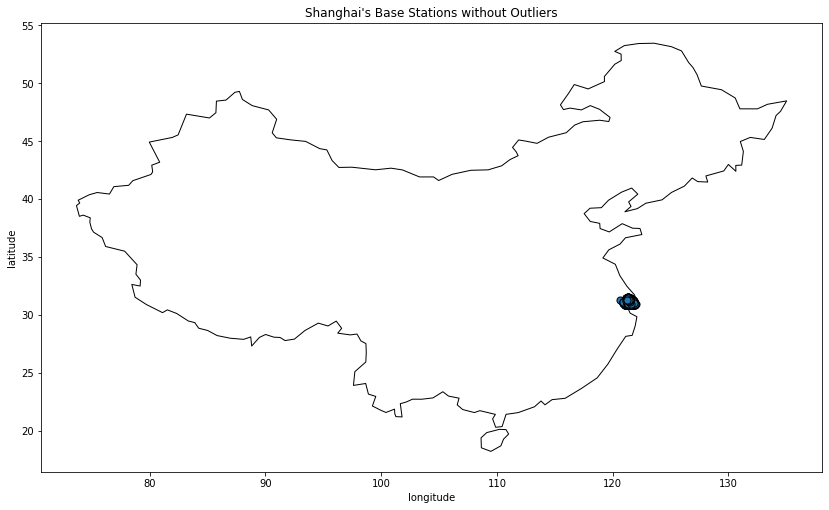

In [7]:
# Dropping Outliers
cdr["longitude"].drop_outliers(threshold = 2.0)
cdr["latitude"].drop_outliers(threshold = 2.0)

# Without Outliers
ax = china["geometry"].geo_plot(
    color = "white",
    edgecolor = "black",
)
cdr.groupby(["longitude", "latitude"]).scatter(
    ["longitude", "latitude"],
    ax = ax,
)
ax.set_title("Shanghai's Base Stations without Outliers")

As we can see from the second plot, we've discarded the base stations outside of Shanghai. 

### Understanding Shanghai's Districts

Let's check the districts on the map. The Huangpu district is the urban "hub" of sorts and the most central of Shanghai's districts, so we'll pay it some special attention. We'll be referring to the Huangpu district as Shanghai's "downtown" in this study.

Text(121.43, 31.25, 'Downtown')

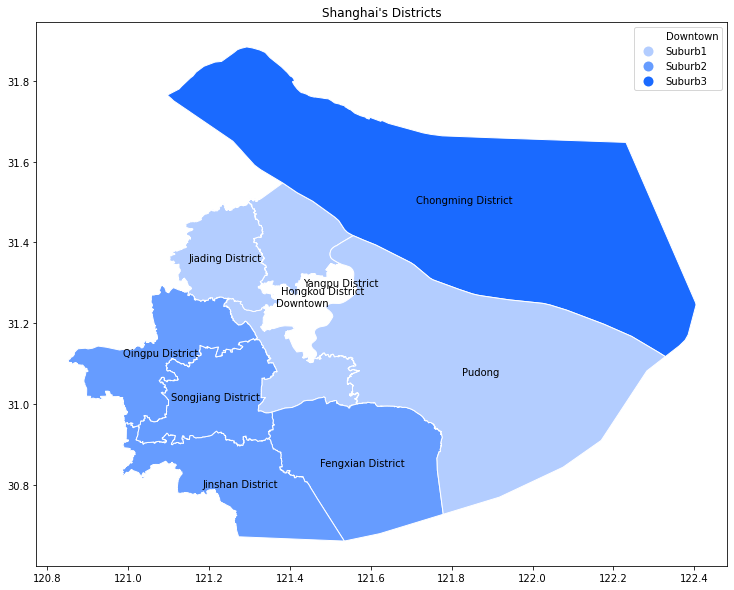

In [8]:
ax = shanghai_districts["geometry"].geo_plot(
    column = "district_level",
    edgecolor='white',
)

# Finding Centroids
centroids = shanghai_districts.select(
    [
        "name", 
        "ST_X(ST_CENTROID(geometry))", 
        "ST_Y(ST_CENTROID(geometry))",
    ],
).to_list()

# Plotting the suburb names
for c in centroids[7:]:
    ax.text(c[1], c[2], c[0], va="center", ha="center")
ax.set_title("Shanghai's Districts")
ax.text(121.43, 31.25, "Downtown", va="center", ha="center")

<AxesSubplot:title={'center':"Shanghai's Downtown"}>

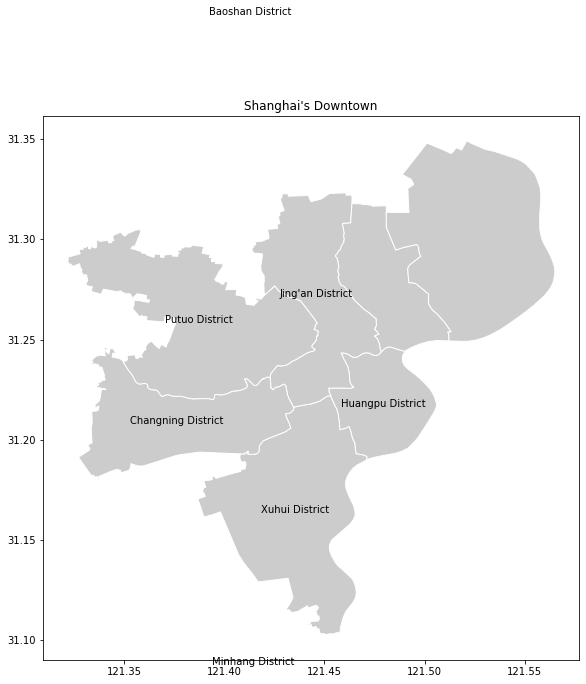

In [9]:
ax2 = shanghai_districts.search("number <= 7")["geometry"].geo_plot(
    color="#CCCCCC",
    edgecolor="white",
)

# Plotting the downtown names
for c in centroids[:7]:
    ax2.text(c[1], c[2], c[0], va="center", ha="center")
ax2.set_title("Shanghai's Downtown")
ax2

### Districts' Activity

Let's examine the network activity of each of our districts. To do this, we need VerticaPy's Geospatial, which leverages Vertica geospatial functions. We begin by creating an index for the districts and then find the intersection between connections and districts. We'll visualize this with a bar chart race, which reflects each district's cumulative activity duration through time.

None   point_id    polygon_gid  
1         32988              5  
2         32989              5  
3         32990              5  
4         32991              5  
5         32992              5  
6         32993              5  
7         32994              5  
8         32995              5  
9         32996              5  
10        32997              5  
11        32998              5  
12        32999              5  
13        33000              5  
14        33001              5  
15        33002              5  
16        33003              5  
17        33004              5  
18        33005              5  
19        33006              5  
20        33007              5  
21        33008              5  
22        33009              5  
23        33010              5  
24        33011              5  
25        33012              5  
26        33013              5  
27        33014              5  
28        33015              5  
29        33016              5  
30        33017              5  
31        33018              5  
32        33019              5  
33        33020              5  
34        33021              5  
35        33022              5  
36        33023              5  
37        33024              5  
38        33025              5  
39        33026              5  
40        33027              5  
41        33028              5  
42        33029              5  
43        33030              5  
44        33031              5  
45        33032              5  
46        33033              5  
47        33034              5  
48        33035              5  
49        33036              5  
50        33037              5  
51        33038              5  
52        33039              5  
53        33040              5  
54        33041              5  
55        33042              5  
56        33043              5  
57        33044              5  
58        33045              5  
59        33046              5  
60        33047              5  
61        33048              5  
62        33049              5  
63        33050              5  
64        33051              5  
65        33052              5  
66        33053              5  
67        33054              5  
68        33055              5  
69        33056              5  
70        33057              5  
71        33058              5  
72        33059              5  
73        33060              5  
74        33061              5  
75        33062              5  
76        33063              5  
77        33064              5  
78        33065              5  
79        33066              5  
80        33067              5  
81        33068              5  
82        33069              5  
83        33070              5  
84        33071              5  
85        33072              5  
86        33073              5  
87        33074              5  
88        33075              5  
89        33076              5  
90        33077              5  
91        33078              5  
92        33079              5  
93        33080              5  
94        33081              5  
95        33082              5  
96        33083              5  
97        33084              5  
98        33085              5  
99        33086              4  
100       33087              4  
Rows: 1-100 | Columns: 2
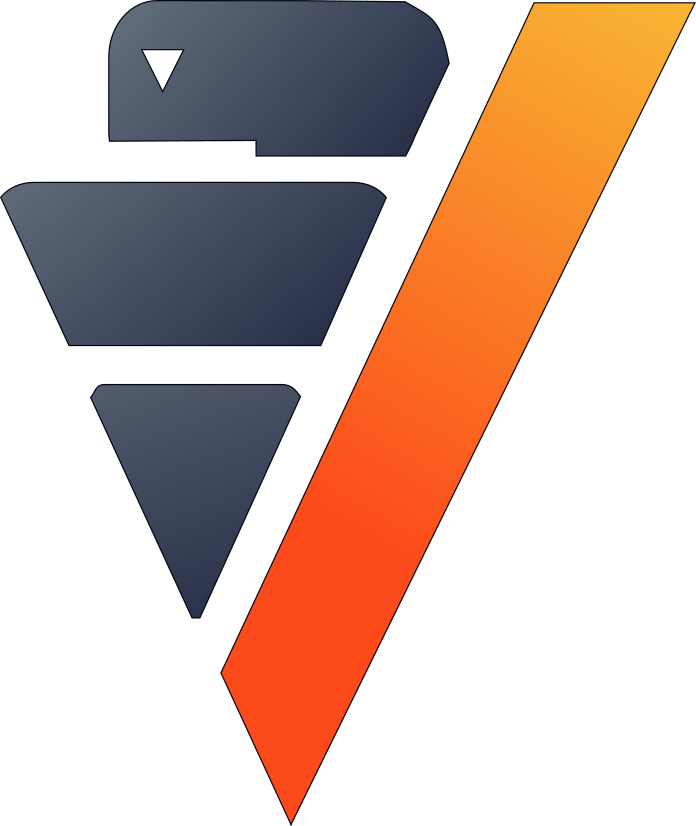

In [10]:
from verticapy.sql.geo import create_index, intersect

# Finding the intersections between each ping and each district
create_index(
    shanghai_districts, 
    gid = "number", 
    g = "geometry", 
    index = "shanghai_districts",
    overwrite = True,
)
intersect_districts_cdr = intersect(
    cdr,
    index = "shanghai_districts",
    gid = "row_id",
    x = "longitude",
    y = "latitude",
)
intersect_districts_cdr.head(100)

In [11]:
# Total Connection Duration
cdr["total_duration"] = (cdr["end_time"] - cdr["start_time"]) / fun.interval("1 minute")

# Features Engineering
cdr["date"] = "DATE(start_time)"

# Total Duration per Connection per district per day
activity = intersect_districts_cdr.join(
    cdr,
    on = {"point_id": "row_id"},
    how = "left",
    expr1 = ["polygon_gid",],
    expr2 = ["start_time", "total_duration", "date",]
).groupby(
    [
        "polygon_gid",
        "date",
    ],
    "SUM(total_duration) AS total_duration",
).join(
    shanghai_districts,
    on = {"polygon_gid": "number"},
    how = "left",
    expr1 = [
        "date",
        "total_duration / area AS total_duration_km2",
    ],
    expr2 = ["name", "district_level"],
)

# Cumulative Duration per Connection per district
activity.cumsum(
    "total_duration_km2", 
    by = ["name"],
    order_by = ["date"],
    name = "activity",
)
activity["activity"] = fun.round(activity["activity"], 2)

# Formatting the date
def date_f(x):
    return x.strftime("%b %d")

# Drawing the activity Bar Race
activity.animated_bar(
    "date", 
    ["name", "activity"],
    by = "district_level",
    start_date = "2014-07-01", 
    end_date = "2014-08-01",
    limit_over = 13,
    date_f = date_f,
)

Like you might expect, Shanghai's downtown is the most active one for the selected period. 

## Data Preparation

### Finding Clusters of Base Stations

We create virtual base stations by grouping existing base stations in 100 clusters. Clustering is performed using k-means clustering on Euclidean coordinates of the base stations. Each cluster represents a wider coverage of connections. 



centers
 longitude | latitude 
-----------+----------
13515.03351|3665.38343
13493.53366|3622.81741
13469.25675|3664.28746
13491.06323|3649.38560
13504.73226|3607.73885
13462.60127|3623.76810
13501.29329|3686.31298
13528.32779|3642.16792
13412.32171|3670.00377
13474.03742|3613.14704
13537.99593|3649.73266
13499.85944|3676.71306
13460.35722|3643.06584
13536.82519|3622.39106
13477.08137|3649.20804
13520.77588|3655.29883
13502.16585|3649.66672
13445.62715|3644.01511
13533.76560|3656.65121
13504.92871|3634.43912
13495.89614|3657.22742
13542.10305|3635.34630
13507.25633|3620.89594
13511.42034|3675.32064
13511.27963|3648.10259
13449.01838|3636.33021
13488.82913|3657.97135
13505.03344|3671.98346
13555.11536|3616.59125
13527.75029|3623.69036
13478.00731|3658.66785
13479.15587|3635.15145
13512.45806|3668.82741
13504.78293|3660.34383
13499.86286|3630.58589
13484.22630|3679.26631
13497.57643|3661.87556
13496.88140|3668.24922
13530.03600|3665.44478
13507.76524|3666.30623
13502.69781|3665.91982
1

<module 'matplotlib.pyplot' from '/Users/badr.ouali/opt/anaconda3/envs/verticapy/lib/python3.9/site-packages/matplotlib/pyplot.py'>

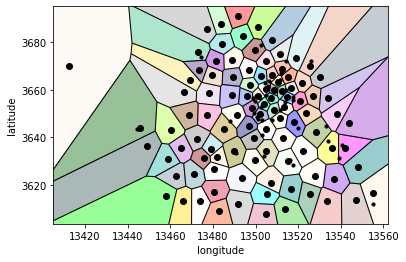

In [12]:
from verticapy.sql.geo import coordinate_converter

# Creating the Base Station Dataset
bs = cdr.groupby(
    ["longitude", "latitude"],
    [
        "COUNT(DISTINCT user_id) AS total_distinct_users",
        "AVG((end_time - start_time) / '1 minute') AS avg_connection_duration",
        "SUM((end_time - start_time) / '1 minute') AS total_connection_duration",
        "COUNT(*) AS connection_number",
    ],
)
# Converting longitude, latitude to x, y
bs_xy = coordinate_converter(bs, "longitude", "latitude")

# Using Clustering
from verticapy.machine_learning.vertica import KMeans

model = KMeans("shanghai.kmeans_bs", n_cluster = 100)
model.fit(bs_xy, ["longitude", "latitude"])
model.predict(bs_xy, name = "cluster")
bs = coordinate_converter(bs_xy, "longitude", "latitude", reverse = True)
vp.drop("shanghai.bs", method = "table")
bs.to_db(
    "shanghai.bs",
    relation_type = "table",
    inplace = True,
)
model.plot_voronoi(plot_crosses = False)

In this figure, each Voronoi cell represents a base station cluster. 

### Identifying Base Station Workloads

Workload is defined as the number of connections per time interval. To find the workloads of the base stations and base station clusters, we'll filter the data to get connections registered in a time frame of one week and then use time-series slicing to get records for every minute per user. 

None              datetime                                 user_id   \\
1      2014-07-06 22:29:00    00139e7e-70b4-53f0-cfd4-29432ee183d0   \\
2      2014-07-06 22:30:00    00139e7e-70b4-53f0-cfd4-29432ee183d0   \\
3      2014-07-06 22:31:00    00139e7e-70b4-53f0-cfd4-29432ee183d0   \\
4      2014-07-06 22:32:00    00139e7e-70b4-53f0-cfd4-29432ee183d0   \\
5      2014-07-06 22:33:00    00139e7e-70b4-53f0-cfd4-29432ee183d0   \\
6      2014-07-06 22:34:00    00139e7e-70b4-53f0-cfd4-29432ee183d0   \\
7      2014-07-06 22:35:00    00139e7e-70b4-53f0-cfd4-29432ee183d0   \\
8      2014-07-06 22:36:00    00139e7e-70b4-53f0-cfd4-29432ee183d0   \\
9      2014-07-06 22:37:00    00139e7e-70b4-53f0-cfd4-29432ee183d0   \\
10     2014-07-06 22:38:00    00139e7e-70b4-53f0-cfd4-29432ee183d0   \\
11     2014-07-06 22:39:00    00139e7e-70b4-53f0-cfd4-29432ee183d0   \\
12     2014-07-06 22:40:00    00139e7e-70b4-53f0-cfd4-29432ee183d0   \\
13     2014-07-06 22:41:00    00139e7e-70b4-53f0-cfd4-29432ee183d0   \\
14     2014-07-06 22:42:00    00139e7e-70b4-53f0-cfd4-29432ee183d0   \\
15     2014-07-06 22:43:00    00139e7e-70b4-53f0-cfd4-29432ee183d0   \\
16     2014-07-06 22:44:00    00139e7e-70b4-53f0-cfd4-29432ee183d0   \\
17     2014-07-06 22:45:00    00139e7e-70b4-53f0-cfd4-29432ee183d0   \\
18     2014-07-06 22:46:00    00139e7e-70b4-53f0-cfd4-29432ee183d0   \\
19     2014-07-06 22:47:00    00139e7e-70b4-53f0-cfd4-29432ee183d0   \\
20     2014-07-06 22:48:00    00139e7e-70b4-53f0-cfd4-29432ee183d0   \\
21     2014-07-06 22:49:00    00139e7e-70b4-53f0-cfd4-29432ee183d0   \\
22     2014-07-06 22:50:00    00139e7e-70b4-53f0-cfd4-29432ee183d0   \\
23     2014-07-05 18:26:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
24     2014-07-05 18:27:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
25     2014-07-05 18:28:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
26     2014-07-05 18:29:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
27     2014-07-05 18:30:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
28     2014-07-05 18:31:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
29     2014-07-05 18:32:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
30     2014-07-05 18:33:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
31     2014-07-05 18:34:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
32     2014-07-05 18:35:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
33     2014-07-05 18:36:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
34     2014-07-05 18:37:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
35     2014-07-05 18:38:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
36     2014-07-05 18:39:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
37     2014-07-05 18:40:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
38     2014-07-05 18:41:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
39     2014-07-05 18:42:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
40     2014-07-05 18:43:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
41     2014-07-05 18:44:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
42     2014-07-05 18:45:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
43     2014-07-05 18:46:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
44     2014-07-05 18:47:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
45     2014-07-05 18:48:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
46     2014-07-05 18:49:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
47     2014-07-05 18:50:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
48     2014-07-05 18:51:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
49     2014-07-05 18:52:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
50     2014-07-05 18:53:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
51     2014-07-05 18:54:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
52     2014-07-05 18:55:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
53     2014-07-05 18:56:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
54     2014-07-05 18:57:00    0019e53b-e51f-b4fd-951e-1a817d8c54ee   \\
55     2014-07-05 18:58:00    0019e53b-e
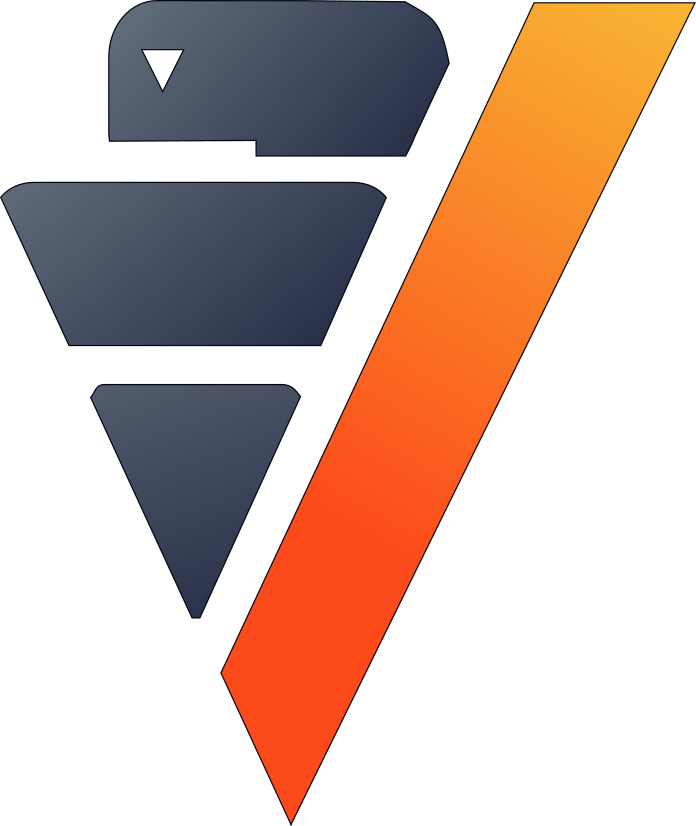

In [13]:
# Filtering to get the first week of July
cdr_sample = cdr.search(
    cdr["start_time"]._between(
        "2014-07-01 00:00:00", 
        "2014-07-08 00:00:00",
    ),
)
# Merging Start Time and End Time to use Time Series Slicing
cdr_sample = cdr_sample.select(
    [
        "row_id", 
        "user_id", 
        "start_time AS datetime", 
        "latitude", 
        "longitude",
    ]
).append(
    cdr_sample.select(
        [
            "row_id", 
            "user_id", 
            "end_time AS datetime", 
            "latitude", 
            "longitude",
        ],
    ),
)
# Slicing the datetime to get one record per mn per user
cdr_sample = cdr_sample.asfreq(
    ts = "datetime",
    rule = "1 minute",
    by = [
        "user_id", 
        "latitude", 
        "longitude", 
        "row_id",
    ],
)
cdr_sample.head(100)

AttributeError: module 'matplotlib.pyplot' has no attribute 'canvas'

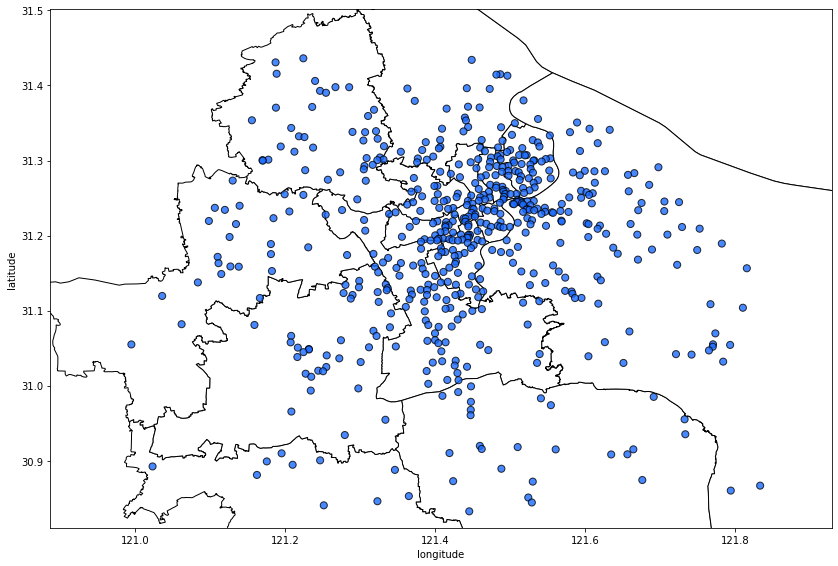

In [14]:
vp.drop("shanghai.bs_workload")
bs_workload = cdr_sample.groupby(
    [
        "datetime",
        "latitude",
        "longitude",
    ], 
    ["COUNT(DISTINCT user_id) AS workload"]
).to_db(
    "shanghai.bs_workload",
    relation_type = "table",
    inplace = True,
)
ax = shanghai_districts["geometry"].geo_plot(
    color = "white",
    edgecolor = "black",
)
bs_workload.animated_scatter(
    "datetime",
    ["longitude", "latitude",],
    start_date = "2014-07-01 15:00:00",
    end_date = "2014-07-01 20:00:00",
    limit_over = 10000,                                                                    
    fixed_xy_lim = True,
    date_in_title = True,
    ax = ax,
)

From the above animation, we can see that we'll typically have unconnected base stations and that the most overloaded base stations are located around the downtown.

Let's define the base station workload as the number of connections in one time point, that is, the 90-th percentile of the interval. We can then calculate the workload for each cluster.

None    latitude     longitude    workload  
1      30.823953    121.528367           1  
2      30.827125    121.329382           1  
3      30.829105    121.180127           1  
4      30.837343    121.275733           1  
5      30.841553    121.161299           1  
6      30.846072     121.32313           1  
7      30.850119    121.499982           1  
8       30.85104    121.524116           1  
9      30.855412    121.569454           1  
10     30.855815    121.311882           1  
11      30.86245    121.124035           1  
12      30.86683     121.83302           2  
13     30.872205    121.530081           2  
14     30.873376    121.040678           1  
15     30.877822    121.548349           1  
16     30.879349    121.094749           1  
17     30.879413    121.704723           1  
18      30.88378    121.573239           1  
19     30.888384    121.980126           1  
20     30.889377    121.176142           2  
21     30.891157    121.186557           1  
22      30.89659    121.281933           1  
23     30.897459    121.151158           1  
24     30.898595    121.030128           1  
25     30.898697    121.172576           1  
26     30.900529    121.246804           1  
27     30.901012    121.167878           1  
28     30.903899    121.906187           1  
29     30.904757    121.467941           1  
30     30.905367    121.832974           1  
31      30.90618    121.178287           1  
32     30.908341    121.870538           1  
33     30.915686    121.462098           2  
34     30.915722    121.763195           1  
35      30.91796    121.543057           1  
36     30.918528    121.113765           1  
37     30.919334    121.475563           2  
38     30.919796    121.459621           1  
39     30.919873    121.464262           2  
40     30.921604    121.471336           1  
41      30.92668    121.466784           1  
42       30.9269    121.467678           2  
43     30.930023    121.011969           1  
44     30.932543    121.716591           1  
45     30.934254    121.279662           2  
46     30.935837    121.561311           1  
47     30.939177    121.223182           1  
48     30.947965    121.640593           2  
49     30.948124    121.381501           1  
50      30.95485    121.328077           1  
51     30.955208    121.732358           1  
52     30.956183    121.908274           1  
53     30.957104    121.146044           1  
54     30.965531    121.208487           1  
55     30.967591    121.656531           1  
56     30.967774    121.447499           2  
57     30.972355    121.610007           1  
58     30.974035    121.554233           1  
59     30.975655    121.228194           1  
60     30.982046    121.207872           1  
61      30.98383    121.235077           1  
62     30.986462    121.409757           1  
63     30.988441     121.87486           2  
64     30.990942     121.12541           1  
65     30.991472    121.430726           2  
66     30.993883    121.129758           2  
67     30.994999    121.264867           1  
68     30.997412    121.247239           1  
69     30.999098    121.447826           2  
70     31.000658    121.659325           1  
71     31.002291    121.873286           1  
72     31.007327    121.431151           2  
73     31.009423    121.245898           2  
74     31.011886    121.234971           3  
75     31.012479    121.240994           1  
76     31.012926    121.423939           1  
77      31.01294    121.637001           1  
78     31.013227    121.552205           1  
79     31.020065     121.23311           2  
80     31.024911    121.255017           1  
81      31.02877    121.456878           1  
82     31.030806    121.396875           2  
83     31.033659    121.577846           1  
84     31.034225    121.254609           1  
85     31.035151    121.544702           1  
86     31.035283    121.246093           1  
87     31.036404    121.272345           1  
88     31.036987    121.386554          
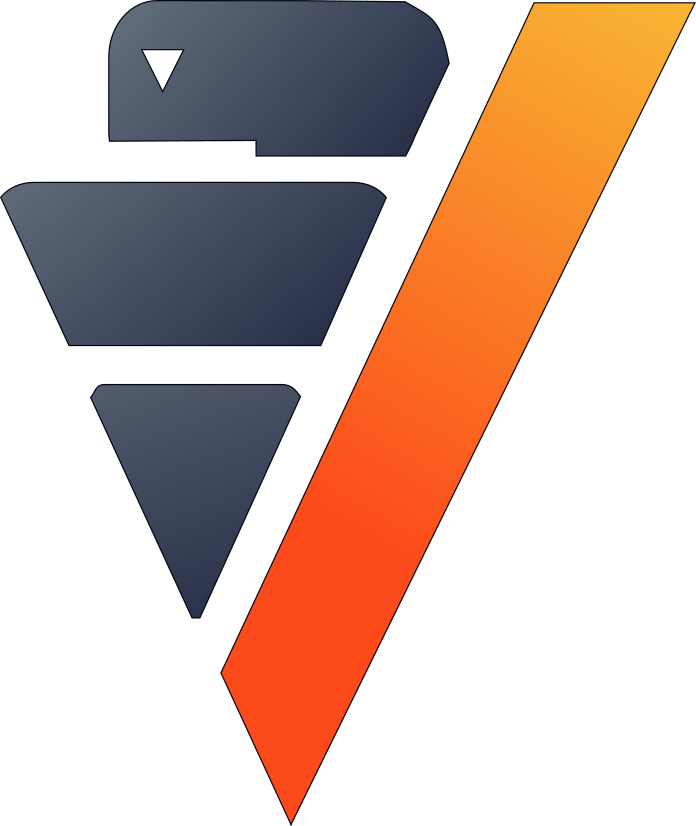

In [15]:
# Base Station Workload 90%
bs_workload_90 = bs_workload.groupby(
    ["latitude", "longitude"],
    "APPROXIMATE_PERCENTILE(workload USING PARAMETERS percentile=0.90) AS workload",
)
bs_workload_90.astype(
    {
        "longitude": "float",
        "latitude": "float",
        "workload": "int",
    },
)
vp.drop("shanghai.bs_workload_90", method = "table")
bs_workload_90.to_db(
    "shanghai.bs_workload_90",
    relation_type = "table",
    inplace = True,
)

None   cluster    workload    total_bs      workload_per_bs  
1            8         1.0           1                  1.0  
2           93        13.0          18    0.722222222222222  
3           59        15.0          22    0.681818181818182  
4           65        16.0          24    0.666666666666667  
5           88         4.0           6    0.666666666666667  
6           50        20.0          32                0.625  
7           69        27.0          45                  0.6  
8           96         9.0          15                  0.6  
9           34        15.0          26    0.576923076923077  
10          61         4.0           7    0.571428571428571  
11          97         4.0           7    0.571428571428571  
12           3        25.0          44    0.568181818181818  
13          43         5.0           9    0.555555555555556  
14          24        11.0          20                 0.55  
15          99         6.0          11    0.545454545454545  
16          30         8.0          16                  0.5  
17          44        11.0          22                  0.5  
18          75         2.0           4                  0.5  
19          91         4.0           8                  0.5  
20          26        11.0          23    0.478260869565217  
21          57         9.0          19    0.473684210526316  
22          19         8.0          17    0.470588235294118  
23          21         9.0          20                 0.45  
24           7         4.0           9    0.444444444444444  
25          37        15.0          35    0.428571428571429  
26          29         5.0          12    0.416666666666667  
27          10         7.0          17    0.411764705882353  
28          53         9.0          22    0.409090909090909  
29          16        22.0          54    0.407407407407407  
30          18        10.0          25                  0.4  
31          47         2.0           5                  0.4  
32          92         4.0          10                  0.4  
33          73         6.0          15                  0.4  
34          95         6.0          15                  0.4  
35          27        15.0          39    0.384615384615385  
36          71        15.0          39    0.384615384615385  
37          67         3.0           8                0.375  
38          63         7.0          19    0.368421052631579  
39          45         4.0          11    0.363636363636364  
40          64         4.0          11    0.363636363636364  
41          31         8.0          22    0.363636363636364  
42          80         5.0          14    0.357142857142857  
43           6         5.0          14    0.357142857142857  
44          81         5.0          14    0.357142857142857  
45          14         6.0          17    0.352941176470588  
46          77         6.0          17    0.352941176470588  
47          11         8.0          23    0.347826086956522  
48          41        10.0          29    0.344827586206897  
49          38         5.0          15    0.333333333333333  
50          49         3.0           9    0.333333333333333  
51          51         7.0          21    0.333333333333333  
52          66         4.0          12    0.333333333333333  
53          12         5.0          15    0.333333333333333  
54          94         3.0           9    0.333333333333333  
55          70         3.0           9    0.333333333333333  
56          79         4.0          12    0.333333333333333  
57          32        22.0          68    0.323529411764706  
58          84        22.0          69    0.318840579710145  
59          23         7.0          22    0.318181818181818  
60          68         7.0          23    0.304347826086957  
61          48         3.0          10                  0.3  
62          54         3.0          10                  0.3  
63          39        21.0          71    0.295774647887324  
64          52         5.0      
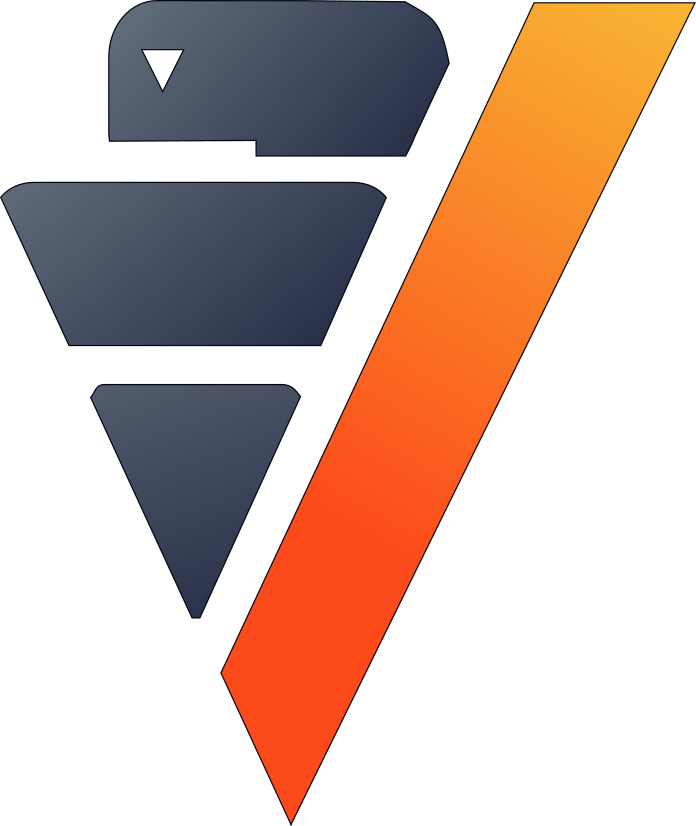

In [16]:
# Clusters Workload 90%
cworkload = coordinate_converter(
    bs_workload, 
    "longitude", 
    "latitude",
)
model.predict(cworkload, name = "cluster")
cworkload = coordinate_converter(
    cworkload, 
    "longitude", 
    "latitude",
    reverse = True)
cworkload_bs = cworkload.groupby(
    ["datetime", "cluster"],
    ["SUM(workload) AS workload",],
).groupby(
     "cluster",
    ["APPROXIMATE_PERCENTILE(workload USING PARAMETERS percentile=0.90) AS workload",],
)
cworkload_bs = cworkload_bs.join(
    bs.groupby("cluster", "COUNT(*) AS cnt"),
    how = "left",
    on = {"cluster": "cluster"},
    expr2 = ["cnt AS total_bs"],
)
cworkload_bs["workload_per_bs"] = cworkload_bs["workload"] / cworkload_bs["total_bs"]
cworkload_bs.sort({"workload_per_bs": "desc"})

## Data Modeling

### Finding New Base Stations positions

Let's find a suitable number of clusters using elbow curve.

In [17]:
# Finding a suitable number of base stations for the region
most_active_cluster = cworkload_bs.search(
    "total_bs > 20"
).sort(
    {"workload_per_bs": "desc"},
)["cluster"][0]
bs_most_active_cluster = bs.search(bs["cluster"] == most_active_cluster)
bs_most_active_cluster.astype(
    {
        "longitude": "float",
        "latitude": "float",
    },
)
bs_most_active_cluster = bs_most_active_cluster.join(
    bs_workload_90,
    how = "left",
    on_interpolate = {
        "longitude": "longitude",
    },
    expr2 = "workload",
)
bs_weight = bs_most_active_cluster.add_duplicates(weight = "workload")
bs_xy = coordinate_converter(bs_weight, "longitude", "latitude")

from verticapy.machine_learning.model_selection import elbow

# Switching back to Plotly
vp.set_option("plotting_lib", "plotly")

elbow(bs_xy, ["longitude", "latitude"])

  0%|          | 0/14 [00:00<?, ?it/s]

The elbow curve seems to indicate that 4 would be a good number of clusters, so let's try k = 4 and view the weighted k-means algorithm's suggested positions for new base stations based on the centers of the clusters.



centers
 longitude | latitude 
-----------+----------
13519.09660|3644.51766
13518.72764|3648.96803
13519.32136|3641.49467
13516.73136|3647.59668


metrics
Evaluation metrics:
     Total Sum of Squares: 272.31089
     Within-Cluster Sum of Squares: 
         Cluster 0: 19.495801
         Cluster 1: 18.693215
         Cluster 2: 0
         Cluster 3: 20.62326
     Total Within-Cluster Sum of Squares: 58.812275
     Between-Cluster Sum of Squares: 213.49862
     Between-Cluster SS / Total SS: 78.4%
 Number of iterations performed: 2
 Converged: True
 Call:
kmeans('shanghai.new_bs_kmeans', '"shanghai"."_verticapy_tmp_view_v_mldb_bb1a729c8bd511ef9f9d8264e8a23743_"', '"longitude", "latitude"', 4
USING PARAMETERS max_iterations=300, epsilon=0.0001, init_method='kmeanspp', distance_method='euclidean')


/Users/badr.ouali/opt/anaconda3/envs/verticapy/lib/python3.9/site-packages/verticapy/plotting/_matplotlib/scatter.py:189: UserWarning:

You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



Text(0.5, 1.0, 'Possible New Base Stations')

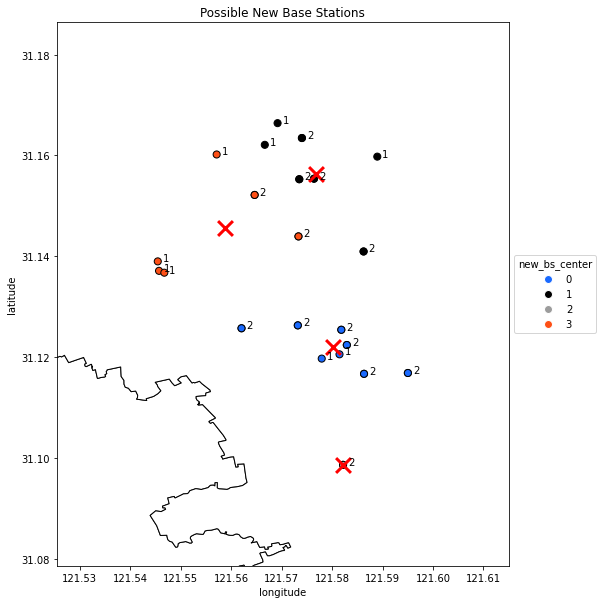

In [18]:
# Switching back to Matplotlib
vp.set_option("plotting_lib", "matplotlib")

# Creating the model
from verticapy.machine_learning.vertica import KMeans

model = KMeans("shanghai.new_bs_kmeans", n_cluster = 4)
model.fit(bs_xy, ["longitude", "latitude"])
model.predict(bs_xy, name = "new_bs_center")
bs_new = coordinate_converter(bs_xy, "longitude", "latitude", reverse = True)

# Drawing the map
ax = shanghai_districts["geometry"].geo_plot(
    color = "white",
    edgecolor = "black",
)
bs_new.scatter(
    [
        "longitude", 
        "latitude",
    ],
    by = "new_bs_center",
    ax = ax,
)
coordinate_converter(
    vp.vDataFrame(
        model.clusters_, 
        usecols = ["longitude", "latitude"],
    ), 
    "longitude", 
    "latitude",
    reverse = True
).scatter(
    [
        "longitude", 
        "latitude",
    ],
    marker = "x",
    color = "r",
    s = 220,
    linewidths = 3,
    ax = ax,
)
ax.set_xlim(
    bs_most_active_cluster["longitude"].min() - 0.02, 
    bs_most_active_cluster["longitude"].max() + 0.02,
)
ax.set_ylim(
    bs_most_active_cluster["latitude"].min() - 0.02, 
    bs_most_active_cluster["latitude"].max() + 0.02,
)

import matplotlib.pyplot as plt

text = bs_most_active_cluster[["longitude", "latitude", "workload"]].to_list()
for t in text:
    ax.text(t[0] + 0.001, t[1], str(t[2]),)
ax.set_title("Possible New Base Stations")

### Predicting Base Station Workload

With the predictive power of AutoML, we can predict the workload of the base stations. AutoML is a powerful technique that tests multiple models to maximize the input score.

The features used to train our model will be longitude, latitude, total number of distinct users, average duration of the connections, total duration of connections, total number of connections, the cluster they belong to, total number of base stations in the cluster, and the workload of the clusters.

None    longitude     latitude    total_distinct_users    avg_connection_duration   \\
1      120.619907    31.317987                       6           26.4905660377358   \\
2      120.907942    31.115773                       2                       22.5   \\
3      120.926117    31.123026                       2                        8.0   \\
4      120.928733    31.041762                      12                       59.6   \\
5      120.970188     31.05815                       3           66.0810810810811   \\
6      121.004091    31.043466                       1                       10.5   \\
7      121.023553    30.892415                      47           63.1481481481481   \\
8      121.030715    31.057607                       2           85.6190476190476   \\
9      121.039819    31.106089                      34           41.8771929824561   \\
10     121.047477    31.014893                       1           8.77777777777778   \\
11     121.054057    30.983162                       5           25.8529411764706   \\
12     121.057024    30.920347                      15           41.1176470588235   \\
13     121.061126    31.108792                      18           52.3611111111111   \\
14     121.062205    31.046753                       1                       13.0   \\
15     121.073778    31.098359                      16           52.0648648648649   \\
16     121.074396    30.939279                      15           14.3260869565217   \\
17     121.083916    31.137582                      26           31.8102564102564   \\
18     121.086225    31.267263                      11           30.1666666666667   \\
19     121.087935    31.260709                      11           20.1463414634146   \\
20     121.094749    30.879349                      11           22.6164383561644   \\
21     121.095344    30.995671                       4                       94.4   \\
22     121.097333    30.956973                       8           9.88311688311688   \\
23     121.098597    31.219455                      15                       20.5   \\
24     121.108326    31.068626                      10           32.9672131147541   \\
25     121.112687    30.864276                       4                       12.0   \\
26     121.113649    31.167279                      28           35.3801652892562   \\
27     121.115166     31.16691                      28           37.6666666666667   \\
28     121.135761    31.373346                      17           22.4464285714286   \\
29     121.147744    31.348039                       2           46.5384615384615   \\
30     121.150279     31.07195                      21           36.1671309192201   \\
31     121.150834    30.945561                      13           57.5637065637066   \\
32      121.15343     31.32755                      38           51.1746031746032   \\
33     121.155902    31.353624                      15           54.4090909090909   \\
34      121.15811    31.184426                      12           21.6896551724138   \\
35     121.161299    30.841553                       5           47.3703703703704   \\
36     121.166179    31.054777                       1                        3.0   \\
37     121.166516    31.116791                      17           83.1525423728814   \\
38     121.167266    31.318258                      36           31.2682926829268   \\
39       121.1676    30.941552                       5           76.4166666666667   \\
40     121.167693    31.301233                       5           49.9090909090909   \\
41     121.167864    30.902581                       1                      131.5   \\
42      121.16892     31.30092                     117           40.2697368421053   \\
43     121.169253    31.280857                     140           44.8983050847458   \\
44       121.1697    31.185228                      24           43.2222222222222   \\
45     121.170082    31.300545                      29            46.219298245614   \
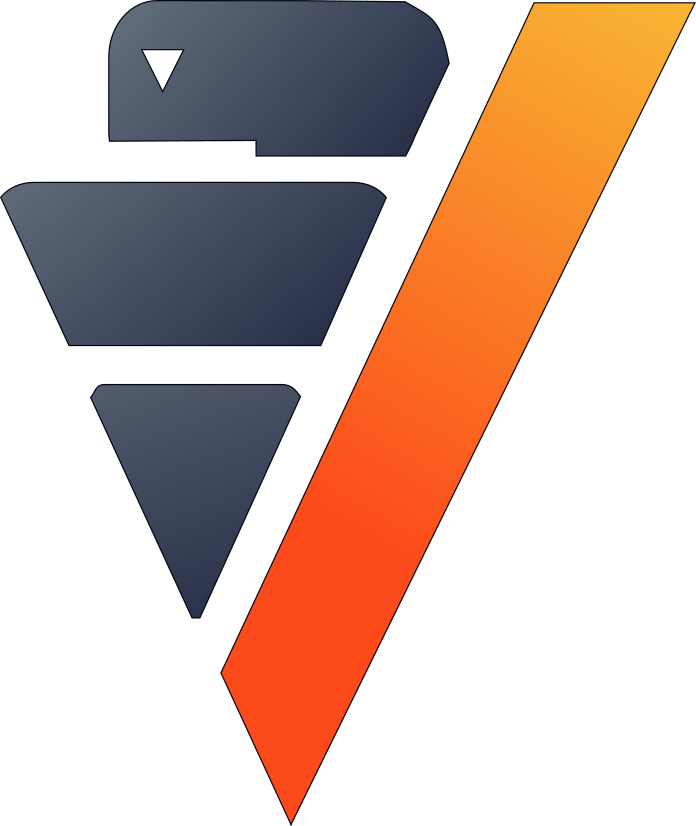

In [19]:
vp.drop("shanghai.bs_metrics", method = "table")
bs_metrics = bs.join(
    cworkload_bs,
    how = "left",
    on = {"cluster": "cluster"},
    expr2 = [
        "total_bs AS cluster_total_bs",
        "workload AS cluster_workload",
    ],
)
bs_metrics.to_db(
    "shanghai.bs_metrics",
    relation_type = "table",
    inplace = True,
)

In [20]:
from verticapy.machine_learning.vertica.automl import AutoML

model = AutoML(
    "shanghai.automl",
    estimator = "fast",
    lmax = 3, 
    stepwise_direction = "backward", 
    stepwise_x_order = "spearman", 
    preprocess_dict = {"identify_ts": False},
)
model.fit(
    bs_metrics, 
    [
        "total_distinct_users", 
        "avg_connection_duration", 
        "total_connection_duration", 
        "connection_number",
        "cluster_total_bs",
    ], 
    "cluster_workload",
)

Starting AutoML



  0%|          | 0/4 [00:00<?, ?it/s]


Testing Model - LinearRegression



  0%|          | 0/2 [00:00<?, ?it/s]

Model: LinearRegression; Parameters: {'tol': 1e-06, 'max_iter': 100, 'solver': 'newton'}; Test_score: 4.3791793751026065; Train_score: 4.337211038917287; Time: 3.4603264331817627;
Model: LinearRegression; Parameters: {'tol': 1e-06, 'max_iter': 100, 'solver': 'bfgs'}; Test_score: 4.332998089998547; Train_score: 4.361358204522696; Time: 4.478479941685994;
Grid Search Selected Model
LinearRegression; Parameters: {'tol': 1e-06, 'max_iter': 100, 'solver': 'bfgs', 'fit_intercept': True}; Test_score: 4.332998089998547; Train_score: 4.361358204522696; Time: 4.478479941685994;

Testing Model - ElasticNet



  0%|          | 0/2 [00:00<?, ?it/s]

Model: ElasticNet; Parameters: {'tol': 1e-06, 'max_iter': 100, 'solver': 'cgd', 'C': 1.0, 'l1_ratio': 0.5}; Test_score: 4.957582459731239; Train_score: 4.958374699059767; Time: 3.4701943397521973;
Grid Search Selected Model
ElasticNet; Parameters: {'tol': 1e-06, 'C': 1.0, 'max_iter': 100, 'solver': 'cgd', 'l1_ratio': 0.5, 'fit_intercept': True}; Test_score: 4.957582459731239; Train_score: 4.958374699059767; Time: 3.4701943397521973;

Testing Model - Ridge



  0%|          | 0/1 [00:00<?, ?it/s]

Model: Ridge; Parameters: {'tol': 1e-06, 'max_iter': 100, 'C': 1.0}; Test_score: 4.33749416892489; Train_score: 4.356946859827876; Time: 3.539017915725708;
Grid Search Selected Model
Ridge; Parameters: {'tol': 1e-06, 'C': 1.0, 'max_iter': 100, 'solver': 'newton', 'fit_intercept': True}; Test_score: 4.33749416892489; Train_score: 4.356946859827876; Time: 3.539017915725708;

Testing Model - Lasso



  0%|          | 0/2 [00:00<?, ?it/s]

Model: Lasso; Parameters: {'tol': 1e-06, 'max_iter': 100, 'solver': 'cgd', 'C': 1.0}; Test_score: 4.6701183117028; Train_score: 4.554325152599216; Time: 3.4694053332010903;
Grid Search Selected Model
Lasso; Parameters: {'tol': 1e-06, 'C': 1.0, 'max_iter': 100, 'solver': 'cgd', 'fit_intercept': True}; Test_score: 4.6701183117028; Train_score: 4.554325152599216; Time: 3.4694053332010903;
Final Model

LinearRegression; Best_Parameters: {'tol': 1e-06, 'max_iter': 100, 'solver': 'bfgs', 'fit_intercept': True}; Best_Test_score: 4.332998089998547; Train_score: 4.361358204522696; Time: 4.478479941685994;


Starting Stepwise


  0%|          | 0/5 [00:00<?, ?it/s]

[Model 0] aic: 8053.7508985786; Variables: ['"total_distinct_users"', '"connection_number"', '"avg_connection_duration"', '"total_connection_duration"', '"cluster_total_bs"']
[Model 1] aic: 8055.40679037467; (-) Variable: "connection_number"
Selected Model

[Model 1] aic: 8055.40679037467; Variables: ['"total_distinct_users"', '"avg_connection_duration"', '"total_connection_duration"', '"cluster_total_bs"']


As we can see, the best model was the linear regression. From the plot below, we can see how linear regression models were more performant and effiecient than other types of models for our dataset.

In [21]:
# Switching back to Plotly
vp.set_option("plotting_lib", "plotly")

model.plot()

## Conclusion

We've solved our problem in a Pandas-like way, all without loading data into memory!